# Regression

## Linear regression

As a very first example, we will build some data that follows a linear behaviour and fit it with a linear regression.

The first step is to import a couple useful libraries:

In [18]:
%matplotlib inline   
# The above line allows to display plots live on a notebook like this one. The line below should do higher quality plots
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np   
import random

Then, we create a dataset of 200 points, which follow the linear relation:

$$Y = X_1 + 2 X_2 + 3 X_3$$

In [19]:
nsamples = 200
X = np.zeros((nsamples,3))   # A matrix of size 200x3, filled with zeroes
Y = np.zeros(nsamples)       # A vector of 200 zeroes


for i in range(nsamples):
    a = random.randint(0,1000)      # Generate 3 random integers between 0 and 1000
    b = random.randint(0,1000)
    c = random.randint(0,1000)
    op = a + 2*b + 3*c              # The equation we want to 'learn'
    
    X[i,0] = a                      # Fill the datasets
    X[i,1] = b
    X[i,2] = c
    Y[i] = op

Now we have our data, stored in variables _X_ and _Y_. Let's fit it with a [linear regression from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) :

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()   # Define the model, using scikit-learn defaults
lr.fit(X,Y);

Did our model accurately learn the data? Let's test it. If our data point is $X = (10,20,30)$, then we expect $Y = 140$.

We can also print the coefficient of the linear model, aka the fit parameters:

In [21]:
print(lr.predict([[10,20,30]]))
print(lr.coef_)

[ 140.]
[ 1.  2.  3.]


Nailed it. But this example might be a tiny bit too simple, right?  
Let's see what happens when we add some noise to the problem

In [22]:
X = np.zeros((nsamples,3)) # Reset X and Y
Y = np.zeros(nsamples)

for i in range(nsamples):
    a = random.randint(0,1000)
    b = random.randint(0,1000)
    c = random.randint(0,1000)
    op = a + 2*b + 3*c
    op_noise = op + np.random.normal(0,np.sqrt(op))   # We add a Gaussian term with a spread of sqrt(y)
    
    X[i,0] = a
    X[i,1] = b
    X[i,2] = c
    Y[i] = op_noise

In [23]:
lr = LinearRegression()
lr.fit(X,Y)

print(lr.predict([[10,20,30]]))
print(lr.coef_)

[ 139.24750412]
[ 1.00875722  1.97969149  3.00757904]


... Close enough.

Linear models aren't the most exciting things there are in machine learning, but they show on simple problems the idea behind machine learning.


## Non-linear regression

Example shamelessly stolen from: https://nbviewer.jupyter.org/github/wildtreetech/advanced-comp-2017/blob/master/02-trees/lecture.ipynb#Gradient-boosting-illustrated

In this example, we generate a non-linear one-dimensional dataset and try to fit it with a [gradient-boosted regression tree.](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)

In [24]:
def f(x):
    return x + np.sin(x) + np.sin(3 * x)  # Quite non-linear

line = np.linspace(0, 10, 200)
x = np.linspace(0, 10, 200)
rng = np.random.RandomState(0)
rng.shuffle(x)
X = np.sort(x[:40])    # We generate 40 random points and apply the non-linear function on them
y = f(X)

X = X.reshape(-1, 1)

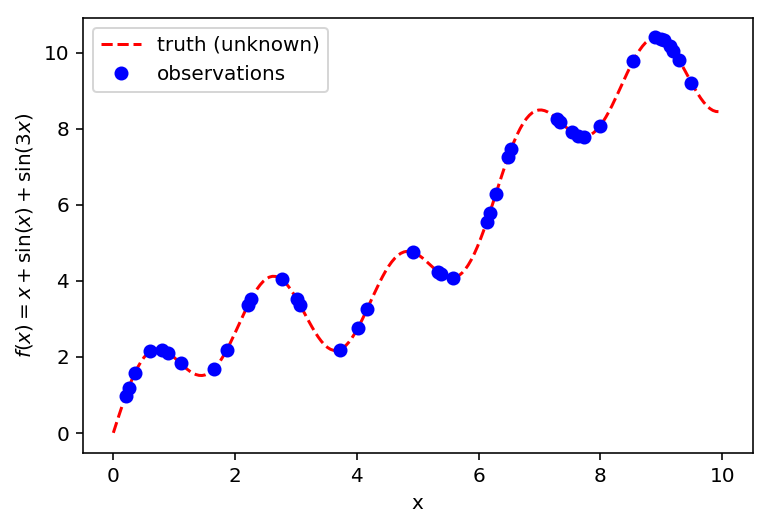

In [25]:
plt.plot(line, f(line), '--r', label='truth (unknown)')
plt.plot(X, y, 'ob', label='observations')
plt.xlabel('x')
plt.ylabel('$f(x)=x+\sin(x)+\sin(3x)$')
plt.legend(loc='best');

Now we have our data. The red curve is what we want to 'learn', and the blue dots is the data we have. The machine learning algorithm will only see the blue dots.

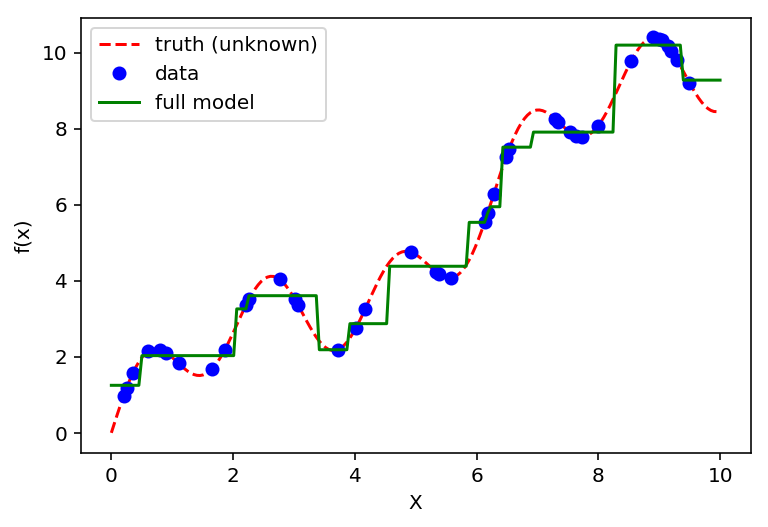

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=2, learning_rate=1)
rgr.fit(X, y)

fig1 = plt.figure()

plt.plot(line, f(line), '--r', label='truth (unknown)')
plt.plot(X, y, 'ob', label='data')
plt.plot(line, rgr.predict(line.reshape(-1, 1)), '-g', label='full model')
plt.ylabel('f(x)')
plt.xlabel("X")
plt.legend(loc='best');

The regressor learned a step-like function. This is expected because of the way decision trees work. Even if the learned function is not exactly the truth model, it can be considered close enough for applications.

# Classification

The goal of a classification problem is to discriminate between two classes inside the data. Let's have a look, graphically.

As a first classification example, we will use scikit-learn built-in [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) method to create a simple two-classes, two-dimensional dataset. We will then use a linear model, [the logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) to find the boundary between the two classes.

In [27]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

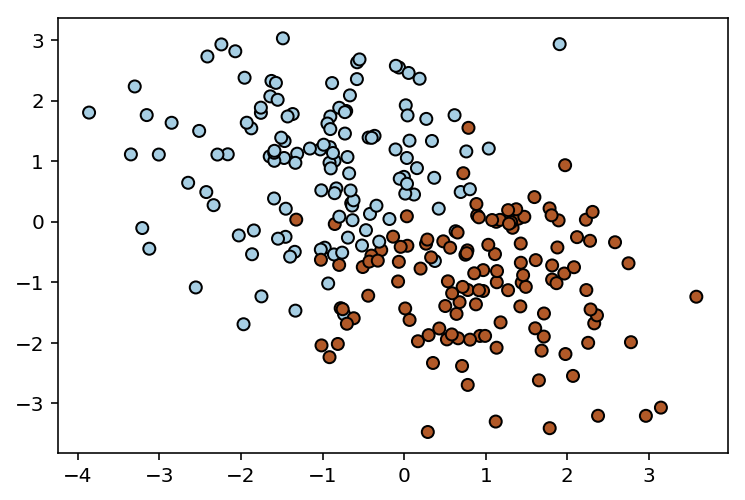

In [28]:
X, y = make_blobs(n_samples=250,centers=[[-1,1],[1,-1]])

plt.scatter(X[:,0],X[:,1],c=y, edgecolors='k', cmap=plt.cm.Paired);

The goal here is to find the decision boundary between the blue and red dots. On such an example you could draw yourself a diagonal line doing said discrimination, without any kind of fancy algorithm. 

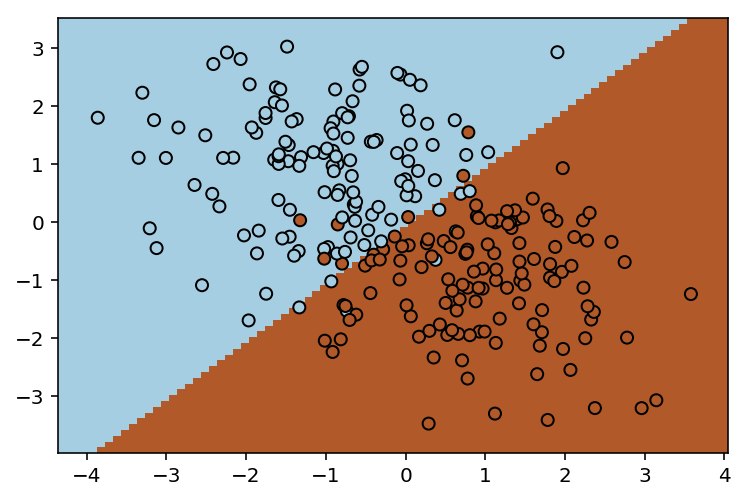

In [29]:
logreg = LogisticRegression()
logreg.fit(X,y)

# Below we do some magic to plot the decision boundary learned by the LogisticRegression
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
grid_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step))  # Define a grid 

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])  # Evaluate the LogisticRegression on all points of that grid
Z = Z.reshape(xx.shape)

# The plot itself
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired);

Indeed a simple linear model finds pretty quickly a good enough decision boundary between the two classes.

What if the problem is non-linear? Let's build a dataset of two concentric circles and train a LogisticRegression on it.

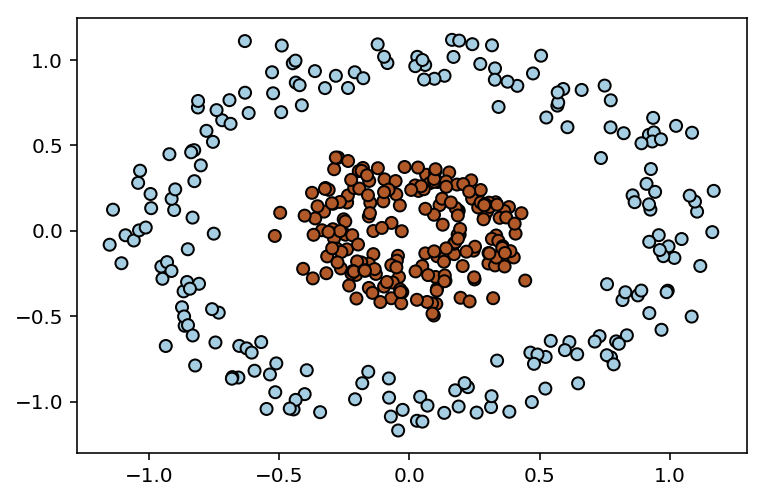

In [30]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired);

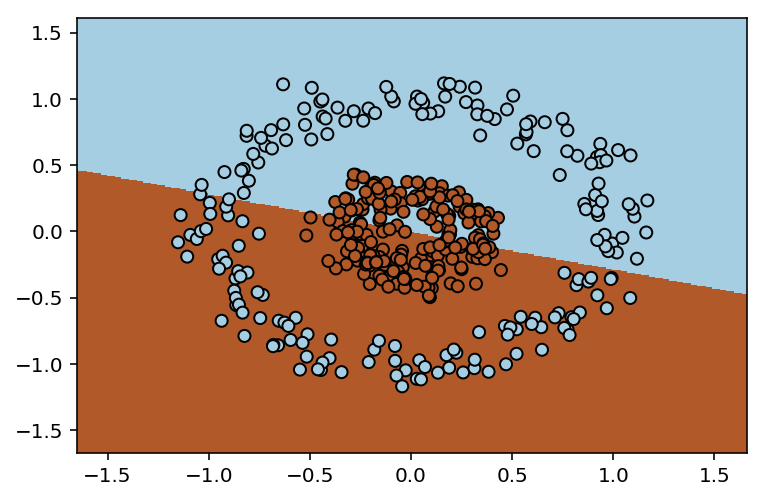

In [31]:
logreg = LogisticRegression()
logreg.fit(X,y)

# Same plot magic
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired);

As expected, it doesn't work: the decision boundary is completely off. 

From here we have at least two possibilities. The first one would be to use our intrinsic knowledge of the problem: we could apply a polar transformation to this dataset, which could then easily be split by a one-dimensional decision boundary.

Or we can use a more powerful algorithm. [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) should do the trick:

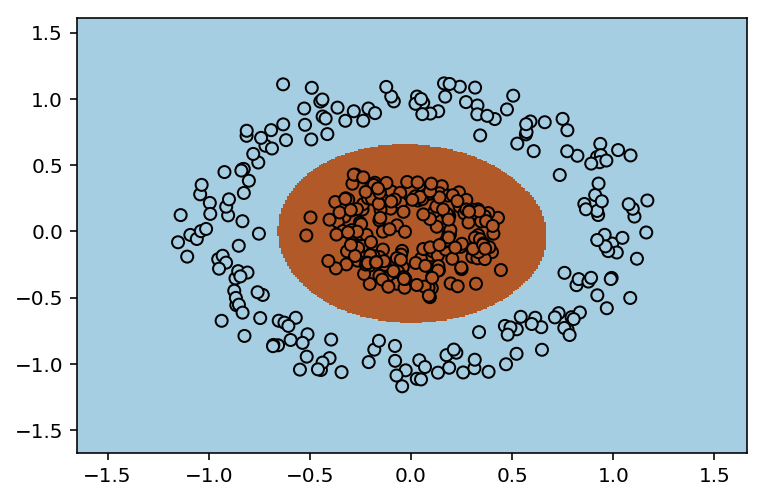

In [32]:
from sklearn.svm import SVC

svm = SVC()   # Basic support vector machine classifier with all parameters set to defaults
svm.fit(X,y)


# Same plot as before
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired);

Wow! What happened?

Support Vector Machines increase the dimensionality of the data by adding new, derived variables that make it possible to linearly discriminate between the classes. 

Our data _X_ is bidimensional. We could add a third dimension by computing $r = \sqrt{x_1^2 + x_2^2}$ , aka the distance between the data point and the centre. 

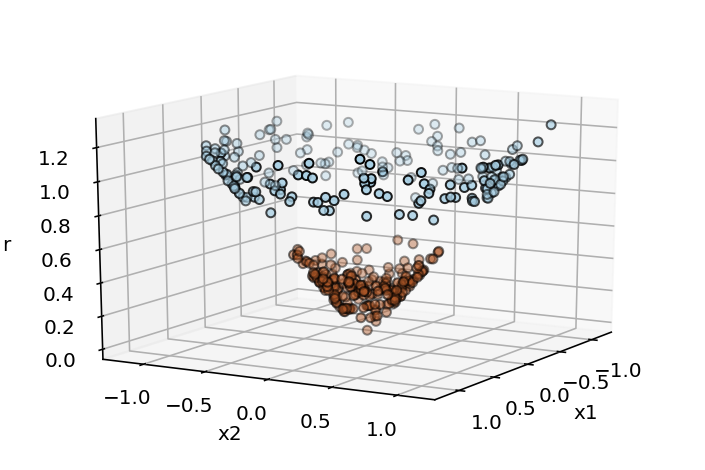

In [33]:
from mpl_toolkits import mplot3d

r = np.sqrt(X[:,0]**2 + X[:,1]**2)

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:,0],X[:,1],r,c=y,edgecolors='k', cmap=plt.cm.Paired)
ax.view_init(elev=15,azim=30)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('r');

Once this transformation is done, finding a linear decision boundary is bloody easy: a horizontal plane at $r \simeq 0.6$.
This is what the SVM did internally. The beauty of it is that we didn't need intrinsic knowledge of the problem to separate the two classes.